In [1]:
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [3]:
a = tf.Variable(dtype=tf.float32, initial_value=0)
p = tf.placeholder(dtype=tf.float32, shape=[3,1])
coeff = np.array([1., 25., -10.]).reshape(3,1)

In [4]:
cost = p[0][0]*a**2 + p[1][0] + p[2][0]*a

In [5]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.4).minimize(cost)

In [6]:
init = tf.global_variables_initializer()

In [7]:
J = [] #keep track of cost per iteration 
I = [] #keep track of iteration number
A = [] #keep track of weight 'a' every iteration

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        _ , j = sess.run(fetches=[optimizer, cost], feed_dict={p : coeff})
        J.append(j)
        I.append(i)
        A.append(sess.run(a))
    print(sess.run(a))

5.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

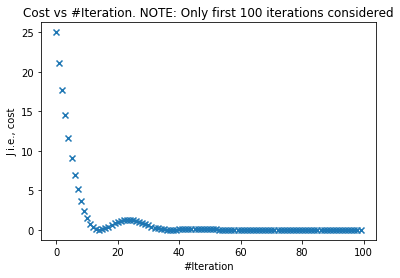

In [10]:
plt.scatter(y=J[:100], x=I[:100], marker='x')
plt.ylabel("J i.e., cost")
plt.xlabel("#Iteration")
plt.title("Cost vs #Iteration. NOTE: Only first 100 iterations considered")

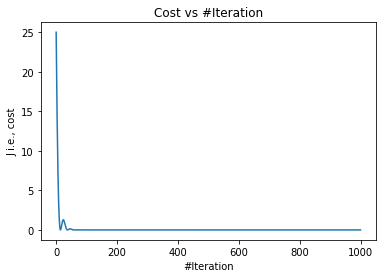

In [11]:
plt.plot(J)
plt.xlabel("#Iteration")
plt.ylabel("J i.e., cost")
plt.title("Cost vs #Iteration")

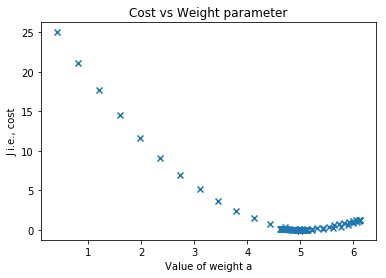

In [12]:
plt.scatter(y=J, x=A, marker='x')
plt.ylabel("J i.e., cost")
plt.xlabel("Value of weight a")
plt.title("Cost vs Weight parameter")